<center><h1>SageDays 129: SageMath Introduction</h1></center>

SageMath is an open source software that combines numerous other open source software packages into a common interface and language built on the widely used and popular Python (ver3). It can perform computations that are useful for a variety of purposes in both teaching and research.

In this introduction, we will demonstrate some basic features of SageMath using the Jupyter notebook interface. (There is also a commandline interace that is essentially the same.)

If you have any questions, please feel free to ask at any time.

We will begin with some basic computations, demonstrating SageMath's basic abilities to be used to perform standard calculations in arithmetic, linear algebra, and calculus.

In [1]:
2+2

4

In [2]:
3^4

81

In [3]:
factorial(10)

3628800

In [4]:
factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [5]:
factorial(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

In [6]:
factor(factorial(10))

2^8 * 3^4 * 5^2 * 7

In [7]:
M = matrix([[1,2],[3,4]])
M

[1 2]
[3 4]

In [8]:
M.det()

-2

In [9]:
M.eigenvectors_right()

[(-0.3722813232690144?, [(1, -0.6861406616345072?)], 1),
 (5.372281323269015?, [(1, 2.186140661634508?)], 1)]

In [10]:
x = SR.var('x')
f = x^2*e^-x/(x+3) * sin(x) + x * e^-x * cos(x)
f

x*cos(x)*e^(-x) + x^2*e^(-x)*sin(x)/(x + 3)

In [11]:
f.derivative(x)

-x*cos(x)*e^(-x) + x^2*cos(x)*e^(-x)/(x + 3) - x*e^(-x)*sin(x) - x^2*e^(-x)*sin(x)/(x + 3) + cos(x)*e^(-x) + 2*x*e^(-x)*sin(x)/(x + 3) - x^2*e^(-x)*sin(x)/(x + 3)^2

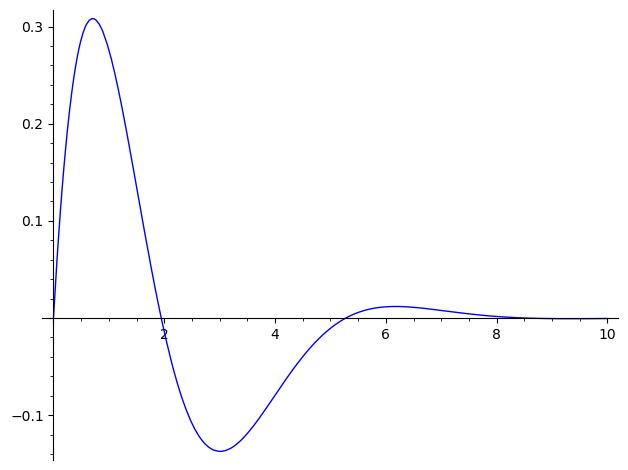

In [12]:
plot(f, [x, 0, 10])

In [13]:
y = SR.var('y')
g = (x - y) / (x^2 + y^2 + 1)
g

(x - y)/(x^2 + y^2 + 1)

In [16]:
g.gradient()

(-2*(x - y)*x/(x^2 + y^2 + 1)^2 + 1/(x^2 + y^2 + 1), -2*(x - y)*y/(x^2 + y^2 + 1)^2 - 1/(x^2 + y^2 + 1))

In [20]:
[gf.factor() for gf in g.gradient()]

[-(x^2 - 2*x*y - y^2 - 1)/(x^2 + y^2 + 1)^2,
 -(x^2 + 2*x*y - y^2 + 1)/(x^2 + y^2 + 1)^2]

In [21]:
plot3d(g, [x, -2, 2], [y, -2, 2], mesh=True)

Graphics3d Object

In [22]:
g.hessian().det().factor()

-8*(x^4 + 2*x^2*y^2 + y^4 - x^2 + 4*x*y - y^2)/(x^2 + y^2 + 1)^5

We can also display the output using latex

In [23]:
%display latex

In [24]:
M

[1 2]
[3 4]

In [25]:
g.hessian().det().factor()

-8*(x^4 + 2*x^2*y^2 + y^4 - x^2 + 4*x*y - y^2)/(x^2 + y^2 + 1)^5

In [26]:
%display plain  # revert back to normal display

SageMath also can make interactive plots that can be useful for teaching. For more examples, please see:

- https://wiki.sagemath.org/interact/
- https://wiki.sagemath.org/interact/graphics

In [27]:
x   = SR.var('x')
x0  = 0
f   = sin(x) * e^(-x)
p   = plot(f, -1, 5, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([1 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -1, 5, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-.5, ymax=1)

Interactive function <function _ at 0x7b14a019a8e0> with 1 widget
  order: SelectionSlider(description='order', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Python, and hence SageMath, cares about what type of object you are working with. (This is called the *class* of the instance.) So they can have different behaviors (e.g., nontrivial primes over $\mathbb{Z}$ exist but not over $\mathbb{Q}$). However, SageMath works behind the scenes to minimize the amount of work you need to do in order to perform arithmetic operations. (This is called *coercion*.) However, you can explicitly cast objects when needed, as in this example with polynomials.

In [28]:
R.<x> = QQ[]
p = (x+1)*15
p.factor()

(15) * (x + 1)

In [29]:
parent(p)

Univariate Polynomial Ring in x over Rational Field

In [30]:
parent(p / 15)

Univariate Polynomial Ring in x over Rational Field

In [31]:
parent(p / (x + 1))

Fraction Field of Univariate Polynomial Ring in x over Rational Field

In [32]:
(p / (x + 1)).factor()

15

In [33]:
ZZ(p / (x + 1)).factor()

3 * 5

SageMath has an extensive documentation about (almost) all of the functions and features, as well as a number of specific tutorials available on its website (many available in different languages, but not the reference manual):

- https://doc.sagemath.org/
- https://doc.sagemath.org/html/en/reference/index.html

This is great if you already know that SageMath has a feature and how to use it. Most of the time you might not know what the command is or how to use it. While you can find it in the documentation, this can be annoying and cumbersome to do. Instead, SageMath provides a way to do it by using **tab completion** and the ``?`` command. 

In [34]:
factor?

Signature:      factor(n, proof=None, int_=False, algorithm='pari', verbose=0, **kwds)
Docstring:     
   Return the factorization of "n".  The result depends on the type of
   "n".

   If "n" is an integer, returns the factorization as an object of
   type "Factorization".

   If "n" is not an integer, "n.factor(proof=proof, **kwds)" gets
   called. See "n.factor??" for more documentation in this case.


     This means that applying "factor()" to an integer result of a
     symbolic computation will not factor the integer, because it is
     considered as an element of a larger symbolic ring.EXAMPLES:

        sage: f(n) = n^2
        sage: is_prime(f(3))
        False
        sage: factor(f(3))
        9

   INPUT:

   * "n" -- nonzero integer

   * "proof" -- boolean or "None" (default: "None")

   * "int_" -- boolean (default: "False"); whether to return answers
     as Python integers

   * "algorithm" -- string

        * "'pari'" -- (default) use the PARI C library

        * "

In [35]:
p?

Type:           Polynomial_rational_flint
String form:    15*x + 15
File:           ~/sage/src/sage/rings/polynomial/polynomial_rational_flint.pyx
Docstring:     
   Univariate polynomials over the rationals, implemented via FLINT.

   Internally, we represent rational polynomial as the quotient of an
   integer polynomial and a positive denominator which is coprime to
   the content of the numerator.
Init docstring:
   Initialises the associated data for the polynomial "self".

   INPUT:

   * "parent" -- polynomial ring, the parent of "self"

   * "x" -- data for the new polynomial "self", e.g. a polynomial, an
     integer, a rational, a list of rationals, a dictionary with keys
     the degrees and the rational coefficients, etc (default: "None")

   * "check" -- whether the integrity of the data needs to be
     verified, largely ignored by this method (default: "True")

   * "is_gen" -- whether "self" shall be initialised as the generator
     of the parent polynomial ring

   * 

In [36]:
GF?

Type:           FiniteFieldFactory
String form:    <sage.rings.finite_rings.finite_field_constructor.FiniteFieldFactory object at 0x7b1505cd2da0>
File:           ~/sage/src/sage/rings/finite_rings/finite_field_constructor.py
Docstring:     
so doctests may not pass.

   Return the globally unique finite field of given order with
   generator labeled by the given name and possibly with given
   modulus.

   INPUT:

   * "order" -- a prime power

   * "name" -- string, optional.  Note that there can be a substantial
     speed penalty (in creating extension fields) when omitting the
     variable name, since doing so triggers the computation of pseudo-
     Conway polynomials in order to define a coherent lattice of
     extensions of the prime field.  The speed penalty grows with the
     size of extension degree and with the number of factors of the
     extension degree.

   * "modulus" -- (optional) either a defining polynomial for the
     field, or a string specifying an algorithm 

In [ ]:
Poly

In [38]:
p.roots()

[(-1, 1)]

In [39]:
p.roots?

Docstring:     
   Return the roots of this polynomial (by default, in the base ring
   of this polynomial).

   INPUT:

   * "ring" -- the ring to find roots in

   * "multiplicities" -- boolean (default: "True"); if "True" return
     list of pairs (r, n), where r is the root and n is the
     multiplicity. If "False", just return the unique roots, with no
     information about multiplicities.

   * "algorithm" -- the root-finding algorithm to use. We attempt to
     select a reasonable algorithm by default, but this lets the
     caller override our choice.

   By default, this finds all the roots that lie in the base ring of
   the polynomial. However, the ring parameter can be used to specify
   a ring to look for roots in.

   If the polynomial and the output ring are both exact (integers,
   rationals, finite fields, etc.), then the output should always be
   correct (or raise an exception, if that case is not yet handled).

   If the output ring is approximate (floating-point 

Beyond these basic features, there are also a number of more advanced topics that are provided within SageMath by default. We will have later a combinatorics tutorial, so instead we will focus on some other areas of mathematics (non-exhaustive; biased by the author's preferences):

- Commutative algebra
- Field extensions
- Group theory
- Representation theory

In [40]:
R.<x,y,z> = QQ[]
I = R.ideal([x + y + z, x*y + x*z + y*z, x*y*z])
I.groebner_basis()

[z^3, y^2 + y*z + z^2, x + y + z]

In [41]:
I.dimension()

0

In [42]:
I.normal_basis()

[y*z^2, z^2, y*z, z, y, 1]

In [43]:
J = R.ideal([x*y, x*y*z])
J.hilbert_series()

(t + 1)/(t^2 - 2*t + 1)

In [44]:
Q = R.quotient(J)
Q

Quotient of Multivariate Polynomial Ring in x, y, z over Rational Field by the ideal (x*y, x*y*z)

In [45]:
Q.gens()

(xbar, ybar, zbar)

In [46]:
Q.is_integral_domain()

False

In [47]:
xb,yb,zb = Q.gens()
xb * yb

0

In [48]:
J.is_prime()

False

In [49]:
R.<a> = QQ[]
S5.<sq5> = QQ.extension(a^2-5)

In [50]:
sq5^2

5

In [51]:
S5.is_field()

True

In [52]:
S56.<t> = S5.extension(a^2-6)
S56

Number Field in t with defining polynomial a^2 - 6 over its base field

In [53]:
S56.galois_group()

/home/tscrim/sage/src/sage/rings/number_field/number_field.py:6296: DeprecationWarning: Use .absolute_field().galois_group() if you want the Galois group of the absolute field
See https://github.com/sagemath/sage/issues/28782 for details.
  return GaloisGroup_v2(self, algorithm=algorithm, names=names, gc_numbering=gc_numbering, _type=type)


Galois group 4T2 (2[x]2) with order 4 of a^2 - 6

In [54]:
A = S56.absolute_field('x')
A

Number Field in x with defining polynomial x^4 - 22*x^2 + 1

In [55]:
A.galois_group()

Galois group 4T2 (2[x]2) with order 4 of x^4 - 22*x^2 + 1

In [56]:
D5 = groups.permutation.Dihedral(5)
D5

Dihedral group of order 10 as a permutation group

In [57]:
D5.order()

10

In [58]:
D5.character_table()

[                     1                      1                      1                      1]
[                     1                     -1                      1                      1]
[                     2                      0      zeta5^3 + zeta5^2 -zeta5^3 - zeta5^2 - 1]
[                     2                      0 -zeta5^3 - zeta5^2 - 1      zeta5^3 + zeta5^2]

In [59]:
D5.normal_subgroups()

[Subgroup generated by [(1,2,3,4,5), (1,5)(2,4)] of (Dihedral group of order 10 as a permutation group),
 Subgroup generated by [(1,2,3,4,5)] of (Dihedral group of order 10 as a permutation group),
 Subgroup generated by [()] of (Dihedral group of order 10 as a permutation group)]

In [60]:
N = D5.normal_subgroups()[1]
Q = D5.quotient(N)
Q

Permutation Group with generators [(1,2)]

In [61]:
AD5 = D5.algebra(QQ)
AD5

Algebra of Dihedral group of order 10 as a permutation group over Rational Field

In [62]:
sum(AD5.basis())

() + (2,5)(3,4) + (1,2)(3,5) + (1,2,3,4,5) + (1,3)(4,5) + (1,3,5,2,4) + (1,4)(2,3) + (1,4,2,5,3) + (1,5,4,3,2) + (1,5)(2,4)

In [63]:
AD5 in Algebras(QQ).Semisimple()

True

In [64]:
AD5 = D5.algebra(GF(5))
AD5

Algebra of Dihedral group of order 10 as a permutation group over Finite Field of size 5

In [65]:
AD5 in Algebras(GF(5)).Semisimple()

False

In [66]:
AD5.cartan_invariants_matrix()

[3 2]
[2 3]

In [67]:
Reg = AD5.regular_representation()
Reg

Left Regular Representation of Dihedral group of order 10 as a permutation group over Finite Field of size 5

In [68]:
Reg.brauer_character()

(10, 0)

In [69]:
AD5.semisimple_quotient().dimension()

2

In [70]:
AD5.orthogonal_idempotents_central_mod_radical()

(3*() + 2*(2,5)(3,4) + 2*(1,2)(3,5) + 3*(1,2,3,4,5) + 2*(1,3)(4,5) + 3*(1,3,5,2,4) + 3*(1,4)(2,3) + 2*(1,4,2,5,3) + 2*(1,5,4,3,2) + 3*(1,5)(2,4),
 3*() + 3*(2,5)(3,4) + 3*(1,2)(3,5) + 2*(1,2,3,4,5) + 3*(1,3)(4,5) + 2*(1,3,5,2,4) + 2*(1,4)(2,3) + 3*(1,4,2,5,3) + 3*(1,5,4,3,2) + 2*(1,5)(2,4))

In [71]:
AD5.peirce_decomposition()

[[Free module generated by {0, 1, 2} over Finite Field of size 5,
  Free module generated by {0, 1} over Finite Field of size 5],
 [Free module generated by {0, 1} over Finite Field of size 5,
  Free module generated by {0, 1, 2} over Finite Field of size 5]]

In [72]:
A3 = AlternatingGroup(3).algebra(CyclotomicField(3))
A3.central_orthogonal_idempotents()

(1/3*() + 1/3*(1,2,3) + 1/3*(1,3,2),
 1/3*() - (1/3*zeta3+1/3)*(1,2,3) - (-1/3*zeta3)*(1,3,2),
 1/3*() - (-1/3*zeta3)*(1,2,3) - (1/3*zeta3+1/3)*(1,3,2))

In [73]:
AlternatingGroup(3).character_table()

[         1          1          1]
[         1      zeta3 -zeta3 - 1]
[         1 -zeta3 - 1      zeta3]